# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import pickle

from arvato_functions import *

In [2]:
# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
#interactive plotting in separate window
%matplotlib qt 

In [198]:
%load_ext autoreload
%autoreload 2
from arvato_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

### First look at Demographics data for the general population of Germany
891 211 persons (rows) x 366 features (columns).

In [3]:
# load in the data
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


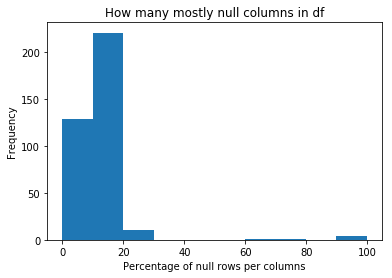

,0,pc_rows_null
LNR,0,0.000000
AGER_TYP,0,0.000000
AKT_DAT_KL,73499,8.247000
ALTER_HH,73499,8.247000
ALTER_KIND1,810163,90.904837
ALTER_KIND2,861722,96.690047
ALTER_KIND3,885051,99.307691
ALTER_KIND4,890016,99.864792
ALTERSKATEGORIE_FEIN,262947,29.504130
ANZ_HAUSHALTE_AKTIV,93148,10.451729


In [4]:
## Look for nans in columns
azdias_nullcols = nullcols_check(azdias)
azdias_nullcols

#### Cleaning

In [5]:
cleaned_azdias = clean_arvato_data(azdias)

['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4'] updated
NaNs pushed to unknown where possible
column EXTSEL992 dropped due to >50% nulls
0 majority-null rows dropped
1 columns had nulls imputed with mode
cannot correct GEOSCORE_KLS7:
    <class 'KeyError'>
    ('GEOSCORE_KLS7',)
    'GEOSCORE_KLS7'
cannot correct HAUSHALTSSTRUKTUR:
    <class 'KeyError'>
    ('HAUSHALTSSTRUKTUR',)
    'HAUSHALTSSTRUKTUR'
cannot correct WACHSTUMSGEBIET_NB:
    <class 'KeyError'>
    ('WACHSTUMSGEBIET_NB',)
    'WACHSTUMSGEBIET_NB'
Unknowns forced to single category
Mixed data types fixed
Columns converted to categorical
finished
size of dataset: (891221, 363)


In [9]:
## Want to make sure that categorical features don't have values that are outside of those specified in the data dictionary
# note GEBURTSJAHR has many 0s in - not helpful

for col in cleaned_azdias.columns:
    try:
        print(f'for {col}, min={min(cleaned_azdias[col])}, max={max(cleaned_azdias[col])}')
    except:
        print(f'{col} is of mixed type')

## Notes:
# ANZ_HAUSHALTE_AKTIV goes up to 595.0 which is high but may represent a large block of flats
# GEBURTSJAHR min = 0, very unhelpful.
# KBA13_ANZAHL_PKW max=2300.0, cannot find in data dictionary, no idea if reasonable or not

for LNR, min=191653, max=1082873
for AGER_TYP, min=-1, max=3
for AKT_DAT_KL, min=1.0, max=9.0
for ALTER_HH, min=0.0, max=21.0
for ALTERSKATEGORIE_FEIN, min=-1.0, max=25.0
for ANZ_HAUSHALTE_AKTIV, min=0.0, max=595.0
for ANZ_HH_TITEL, min=0.0, max=23.0
for ANZ_KINDER, min=0.0, max=11.0
for ANZ_PERSONEN, min=0.0, max=45.0
for ANZ_STATISTISCHE_HAUSHALTE, min=0.0, max=449.0
for ANZ_TITEL, min=0.0, max=6.0
for ARBEIT, min=1.0, max=9.0
for BALLRAUM, min=-1.0, max=7.0
CAMEO_DEU_2015 is of mixed type
for CAMEO_DEUG_2015, min=-1, max=9
for CAMEO_INTL_2015, min=-1, max=55
for CJT_GESAMTTYP, min=1.0, max=6.0
for CJT_KATALOGNUTZER, min=1.0, max=5.0
for CJT_TYP_1, min=1.0, max=5.0
for CJT_TYP_2, min=1.0, max=5.0
for CJT_TYP_3, min=1.0, max=5.0
for CJT_TYP_4, min=1.0, max=5.0
for CJT_TYP_5, min=1.0, max=5.0
for CJT_TYP_6, min=1.0, max=5.0
for D19_BANKEN_ANZ_12, min=0, max=6
for D19_BANKEN_ANZ_24, min=0, max=6
for D19_BANKEN_DATUM, min=1, max=10
for D19_BANKEN_DIREKT, min=0, max=7
for D19_BANKEN_GROSS

### Demographics data for customers of a mail-order company
191 652 persons (rows) x 369 features (columns) <br>
Should be similar to previous dataset

In [6]:
# load in the data
customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Cleaning

In [7]:
cleaned_customers = clean_arvato_data(customers)

['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4'] updated
NaNs pushed to unknown where possible
column EXTSEL992 dropped due to >50% nulls
0 majority-null rows dropped
1 columns had nulls imputed with mode
cannot correct GEOSCORE_KLS7:
    <class 'KeyError'>
    ('GEOSCORE_KLS7',)
    'GEOSCORE_KLS7'
cannot correct HAUSHALTSSTRUKTUR:
    <class 'KeyError'>
    ('HAUSHALTSSTRUKTUR',)
    'HAUSHALTSSTRUKTUR'
cannot correct WACHSTUMSGEBIET_NB:
    <class 'KeyError'>
    ('WACHSTUMSGEBIET_NB',)
    'WACHSTUMSGEBIET_NB'
Unknowns forced to single category
Mixed data types fixed
Columns converted to categorical
finished
size of dataset: (191652, 366)


### Cleaned Data

#### Output as pickle

In [44]:
filename = 'azdias_cleaned'
outfile = open(filename,'wb')
pickle.dump(cleaned_azdias,outfile)
outfile.close()

In [ ]:
filename = 'customers_cleaned'
outfile = open(filename,'wb')
pickle.dump(cleaned_customers,outfile)
outfile.close()

#### Read in pickle

In [6]:
filename = 'azdias_cleaned'
infile = open(filename,'rb')
azdias_cleaned = pickle.load(infile)
infile.close()

In [6]:
filename = 'customers_cleaned'
infile = open(filename,'rb')
customers_cleaned = pickle.load(infile)
infile.close()

In [ ]:
# azdias_cleaned.head(5)
azdias_cleaned['CAMEO_DEU_2015'].unique()

### Sample Cleaned Data

#### General population

In [8]:
fraction=0.1 #0.3
sample_azdias = tidy_data(azdias_cleaned.sample(frac=fraction, replace=False, random_state=1))

#### Customers

In [ ]:
fraction=0.3

In [52]:
# For un-supervised do not need the mail order company data
sample_customers = customers_cleaned.drop(labels=['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE'], axis=1)
sample_customers = tidy_data(sample_customers.sample(frac=fraction, replace=False, random_state=1))

#### Output as pickle

In [9]:
fraction=0.1
filename = f'sample_azdias_{fraction}'
outfile = open(filename,'wb')
pickle.dump(sample_azdias,outfile)
outfile.close()

In [10]:
del azdias_cleaned
gc.collect()

In [11]:
fraction=0.3
filename = f'sample_customers{fraction}'
outfile = open(filename,'wb')
pickle.dump(sample_customers,outfile)
outfile.close()

In [54]:
del customers_cleaned
gc.collect()

Cleaning all done on Udacity Servers

## Read in cleaned, sampled data

#### Read in pickle

In [12]:
fraction=0.1
filename = f'sample_azdias_{fraction}'
infile = open(filename,'rb')
sample_azdias = pickle.load(infile)
infile.close()

In [13]:
fraction=0.3
filename = f'sample_customers{fraction}'
infile = open(filename,'rb')
sample_customers = pickle.load(infile)
infile.close()

In [20]:
## Sample again at 0.5 to help this run - try one day to run without this
subsample=0.5
sample_azdias = sample_azdias.sample(frac=subsample, replace=False, random_state=1)
sample_customers = sample_customers.sample(frac=subsample, replace=False, random_state=1)

#### Output as pickle

In [21]:
filename = 'sample_azdias'
outfile = open(filename,'wb')
pickle.dump(sample_azdias,outfile)
outfile.close()

In [22]:
filename = 'sample_customers'
outfile = open(filename,'wb')
pickle.dump(sample_customers,outfile)
outfile.close()

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

### FAMD

Note that PCA is best for linear relations and continuous rather than categorical variables, so FAMD trialled <br>
see https://pypi.org/project/light-famd/ and https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210

In [89]:
from prince import FAMD

#### Prepare Sample

In [237]:
to_drop = []
for col in sample_azdias.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} car columns to remove')

180 car columns to remove


In [242]:
gen_pop = prepare_famd(sample_azdias, continuous_vars, to_drop, reduce_columns=True, subsample=0.5)

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 44561 rows, 180 columns


In [243]:
datatypes_summary(gen_pop)

,
column_types,data_types
category,<class 'str'>
float64,<class 'numpy.float64'>
int64,<class 'numpy.int64'>


#### Fit FAMD on general population data

In [64]:
famd = FAMD(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
azdias_famd = famd.fit(gen_pop)

ValueError: Not all columns in "Categorical" group are of the same type

Problem with implementation - https://github.com/MaxHalford/prince/issues/109

Might have to do PCA and MCA separately.

### MCA + PCA
Given problems with the implementation of FAMD in prince meaning it is unable to cope with string-type categorical variables, in order to deal with both categorical and continuous features, a combination of MCA and PCA is used.

In [23]:
from prince import MCA, PCA

#### MCA

##### Prepare Sample

In [145]:
filename = 'sample_azdias'
infile = open(filename,'rb')
sample_azdias = pickle.load(infile)
infile.close()

In [146]:
filename = 'sample_customers'
infile = open(filename,'rb')
sample_customers = pickle.load(infile)
infile.close()

In [147]:
to_drop = []
for col in sample_azdias.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


Note that due to issue with MCA https://github.com/MaxHalford/prince/issues/107#issuecomment-768144230, missing categories in test set cannot be handled properly and .transform is not possible. Therefore a work-around is used where columns are one-hot-encoded PRIOR to MCA (which should not normally be necessary)

In [148]:
print('Categorical data preparation:')
print('\r')
print('General population:')
train_cat = prepare_mca(sample_azdias, to_drop, continuous_vars, reduce_columns=True, subsample=1.0) #0.5
print('\r')
print('Customer population:')
test_cat = prepare_mca(sample_customers, to_drop, continuous_vars, reduce_columns=True, subsample=1.0) #0.5

Categorical data preparation:

General population:
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of MCA prepared data = 11140 rows, 1389 columns

Customer population:
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of MCA prepared data = 44561 rows, 1407 columns


In [149]:
## Check columns match
test_cat, train_cat  = match_ohe_dfs(test_cat, train_cat, 'test', 'train')

Checking test and train match...
in test but not train:
{'TITEL_KZ_5.0', 'D19_VERSI_ONLINE_DATUM_1', 'ALTER_HH_2.0', 'D19_BANKEN_ONLINE_QUOTE_12_9.0', 'D19_TELKO_ONLINE_DATUM_2', 'ANZ_KINDER_6.0', 'GEBAEUDETYP_5.0', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_VERSI_ONLINE_QUOTE_12_7.0', 'TITEL_KZ_2.0', 'D19_LOTTO_4.0', 'D19_BANKEN_ONLINE_QUOTE_12_1.0', 'D19_HANDWERK_2', 'ANZ_KINDER_9.0', 'D19_REISEN_1', 'D19_TELKO_ANZ_12_5', 'TITEL_KZ_4.0', 'D19_TELKO_ANZ_24_5'}
no columns in train that are not in test

no columns in test that are not in train
no columns in train that are not in test
...test and train now match
Matching column order...
...done


This creates 'dummy' columns of 0s only - note this won't work with train for some reason - get divide by 0 error. Therefore drop in test what is not in train (not ideal). </br>
Note that if I remove in train things that are not in test I get errors with MCA fit - possibly results in a feature of only 0s? </br>
Cannot deal with errors with MCA transform with test without carrying out OHE separately </br>
Could try to find examples of these values in larger sample, or take larger set of customers and hope?

In [150]:
## Check for nulls/inf

# train_cat[train_cat.isna().any(axis=1)]
# train_cat[train_cat.isin([np.inf, -np.inf]).any(axis=1)]

##### Fit MCA on categorical general population data

In [151]:
mca = MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
azdias_mca = mca.fit(train_cat)

MCA for categorical data



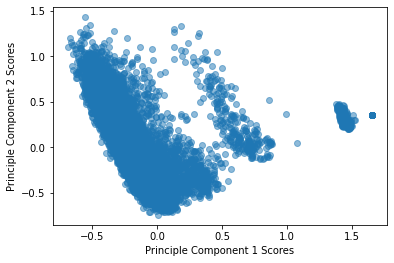

  Driving highly negative PC1 values Driving highly positive PC1 values
0     D19_BANKEN_ONLINE_QUOTE_12_2.0                 WOHNDAUER_2008_1.0
1                       D19_GARTEN_2                       TITEL_KZ_1.0
2     D19_BANKEN_ONLINE_QUOTE_12_7.0                        SOHO_KZ_1.0
3           D19_TELKO_ONLINE_DATUM_4                    OST_WEST_KZ_1.0
4     D19_BANKEN_ONLINE_QUOTE_12_8.0                      BALLRAUM_-1.0

  Driving highly negative PC2 values Driving highly positive PC2 values
0                       ALTER_HH_3.0      D19_TELKO_ONLINE_QUOTE_12_5.0
1                       ALTER_HH_4.0     D19_BANKEN_ONLINE_QUOTE_12_2.0
2           ALTERSKATEGORIE_FEIN_4.0     D19_BANKEN_ONLINE_QUOTE_12_7.0
3            LP_LEBENSPHASE_FEIN_6.0                 D19_TELKO_ANZ_12_4
4              ONLINE_AFFINITAET_0.0     D19_BANKEN_ONLINE_QUOTE_12_8.0


In [152]:
gen_pop_mca_results = plot_mca(azdias_mca, train_cat)

Note that since the data had to be one-hot-encoded BEFORE mca, the explained_inertia_ throws a float division by zero error, which it did not do before. See below for how it runs without the OHE:

###### Example without OHE:

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of MCA prepared data = 5570 rows, 172 columns
MCA for categorical data



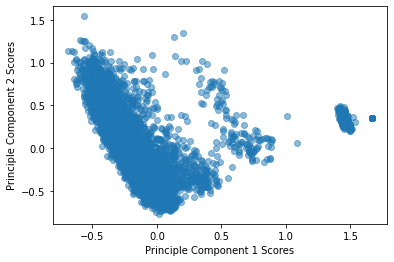

First two components explain: [0.03788411188424113, 0.02263222602968814], total inertia = 6.994186046511628

  Driving highly negative PC1 values Driving highly positive PC1 values
0                D19_KINDERARTIKEL_1                 WOHNDAUER_2008_1.0
1                  D19_TIERARTIKEL_1                       TITEL_KZ_1.0
2                 D19_TELKO_ANZ_12_4                        SOHO_KZ_1.0
3     D19_BANKEN_ONLINE_QUOTE_12_8.0                    OST_WEST_KZ_1.0
4                       D19_GARTEN_2                      EWDICHTE_-1.0

  Driving highly negative PC2 values Driving highly positive PC2 values
0           ALTERSKATEGORIE_FEIN_2.0                 D19_TELKO_ANZ_12_4
1           ALTERSKATEGORIE_FEIN_4.0                  D19_TIERARTIKEL_1
2                       ALTER_HH_4.0                D19_BANKEN_ANZ_12_6
3            LP_LEBENSPHASE_FEIN_6.0                D19_KINDERARTIKEL_1
4              ONLINE_AFFINITAET_0.0                D19_BANKEN_ANZ_24_6


In [153]:
example = prepare_mca(sample_azdias, to_drop, continuous_vars, reduce_columns=True, subsample=0.5, onehot=False)
eg_mca = MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
eg_train_mca = eg_mca.fit(example)
_ = plot_mca(eg_train_mca, example, show_inertia=True)

In [154]:
(0.03788411188424113 + 0.02263222602968814)/6.994186046511628

0.008652377490603352

Not sure how to interpret inertia explained anyway

##### Apply MCA to categorical customer population data

In [155]:
customer_mca = azdias_mca.transform(test_cat)

MCA for categorical data



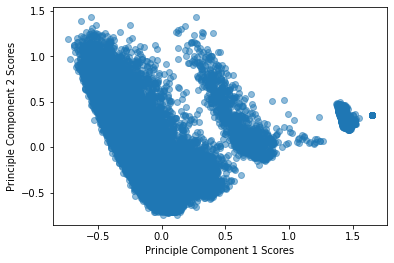

In [156]:
customer_mca_results = plot_mca(customer_mca, test_cat, fit=False, analyse_loadings=False)

In [157]:
## Cleanup
del train_cat, test_cat, mca, azdias_mca, customer_mca
gc.collect()

5680

#### PCA

##### Prepare Sample

In [158]:
print('Continuous data preparation:')
print('\r')
print('General population:')
train_cont = prepare_pca(sample_azdias, to_drop, continuous_vars, subsample=0.5)
print('\r')
print('Customer population:')
test_cont = prepare_pca(sample_customers, to_drop, continuous_vars, subsample=0.5)

Continuous data preparation:

General population:
shape of PCA prepared data = 5570 rows, 8 columns

Customer population:
shape of PCA prepared data = 22280 rows, 8 columns


In [159]:
## Check columns match
test_cont, train_cont = match_ohe_dfs(test_cont, train_cont, 'test', 'train')

Checking test and train match...
no columns in test that are not in train
no columns in train that are not in test

...test and train now match
Matching column order...
...done


##### Fit PCA on continuous general population data

In [160]:
pca = PCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
azdias_pca = pca.fit(train_cont)

PCA for categorical data



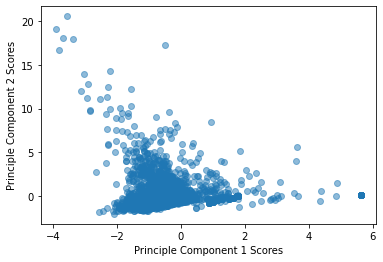

First two components explain: [0.39138479 0.25035673], total inertia = 8.000000000000002

  Driving highly negative PC1 values Driving highly positive PC1 values
0               EINGEZOGENAM_HH_JAHR                          ANZ_TITEL
1                   KBA13_ANZAHL_PKW                       ANZ_HH_TITEL
2                        GEBURTSJAHR         ANZ_STATISTISCHE_HAUSHALTE
3                       ANZ_PERSONEN                ANZ_HAUSHALTE_AKTIV
4                ANZ_HAUSHALTE_AKTIV                       ANZ_PERSONEN

  Driving highly negative PC2 values Driving highly positive PC2 values
0                       ANZ_PERSONEN         ANZ_STATISTISCHE_HAUSHALTE
1                        GEBURTSJAHR                ANZ_HAUSHALTE_AKTIV
2                   KBA13_ANZAHL_PKW                       ANZ_HH_TITEL
3               EINGEZOGENAM_HH_JAHR                          ANZ_TITEL
4                          ANZ_TITEL               EINGEZOGENAM_HH_JAHR


In [161]:
gen_pop_pca_results = plot_pca(azdias_pca, train_cont)

##### Apply PCA to continuous customer population data

In [162]:
customer_pca = azdias_pca.transform(test_cont)

PCA for categorical data



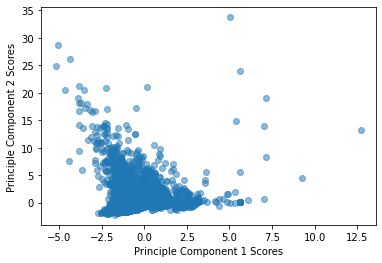

In [163]:
customer_pca_results = plot_pca(customer_pca, test_cont, fit=False, analyse_loadings=False)

In [164]:
## Cleanup
del train_cont, test_cont, pca, azdias_pca, customer_pca, sample_customers
gc.collect()

6218

### Clustering

#### K Means

In [165]:
from sklearn.cluster import KMeans

In [45]:
## Let it find number of clusters itself:
clusters_inertia = []
for i in range(1, 10):
    print(f'Fitting to {i} clusters') 
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=1)
    kmeans.fit(gen_pop_mca_results)
    clusters_inertia.append(kmeans.inertia_)

Fitting to 1 clusters
Fitting to 2 clusters
Fitting to 3 clusters
Fitting to 4 clusters
Fitting to 5 clusters
Fitting to 6 clusters
Fitting to 7 clusters
Fitting to 8 clusters
Fitting to 9 clusters


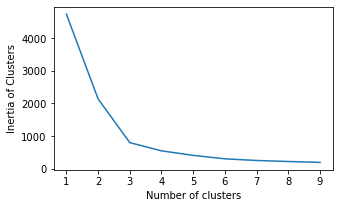

In [46]:
## Plot
plt.figure(figsize=(5,3))
plt.plot(range(1, 10), clusters_inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia of Clusters')
plt.show()

As expected, 3 looks good

In [47]:
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=1)

In [48]:
#predict the labels of clusters.
mca_labels = kmeans.fit_predict(gen_pop_mca_results)
mca_centers = kmeans.cluster_centers_

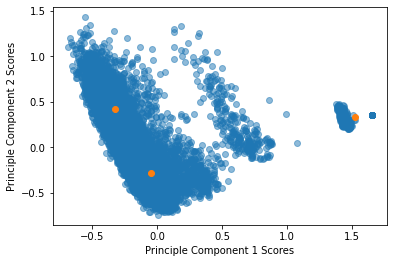

In [49]:
plt.scatter(gen_pop_mca_results['PC1'], gen_pop_mca_results['PC2'], alpha=0.5);
plt.scatter(pd.DataFrame(mca_centers).iloc[:,0], pd.DataFrame(mca_centers).iloc[:,1])
plt.xlabel('Principle Component 1 Scores');
plt.ylabel('Principle Component 2 Scores');

Not so good, try more centres. Or could predict and compare anyway, since this cannot be done with DBSCAN?

In [50]:
kmeans = KMeans(n_clusters=7, init = "k-means++", random_state=1)

In [51]:
#predict the labels of clusters.
mca_labels = kmeans.fit_predict(gen_pop_mca_results)
mca_centers = kmeans.cluster_centers_

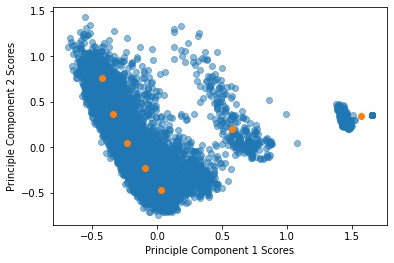

In [52]:
plt.scatter(gen_pop_mca_results['PC1'], gen_pop_mca_results['PC2'], alpha=0.5);
plt.scatter(pd.DataFrame(mca_centers).iloc[:,0], pd.DataFrame(mca_centers).iloc[:,1])
plt.xlabel('Principle Component 1 Scores');
plt.ylabel('Principle Component 2 Scores');

Predict on customer set, and then analyse cluster centers in terms of values of PCs?

#### DBSCAN

Note DBSCAN has no 'predict'-like function, it is only clustering, so cannot try to assign clusters to customers based on cluster centers learned from general population (as you could with k-means), and so the customers will have to be fitted with a new clustering object and the clusters compared.

In [53]:
from sklearn.cluster import DBSCAN

Estimated number of clusters: 4
Estimated number of noise points: 218


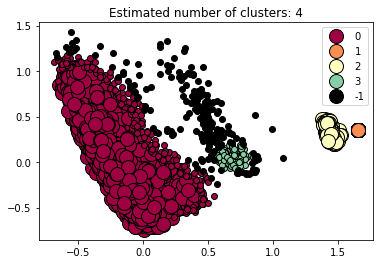

In [173]:
mca_clusters = DBSCAN(eps=0.145, min_samples=100).fit(gen_pop_mca_results)
DBSCAN_processing(mca_clusters, gen_pop_mca_results)

In [174]:
pop_clustered_mca = gen_pop_mca_results.copy(deep=True)
pop_clustered_mca.loc[:,'Cluster'] = mca_clusters.labels_ # append labels to points
total = pop_clustered_mca.shape[0]

DBSCAN_clust_sizes = pop_clustered_mca.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["general_population_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_pop'] = 100*(DBSCAN_clust_sizes["general_population_DBSCAN_size"]/total)
DBSCAN_clust_sizes

,general_population_DBSCAN_size,percentage_of_pop
Cluster,,
-1,218,1.956912
0,9904,88.904847
1,573,5.143627
2,345,3.096948
3,100,0.897666


Estimated number of clusters: 4
Estimated number of noise points: 499


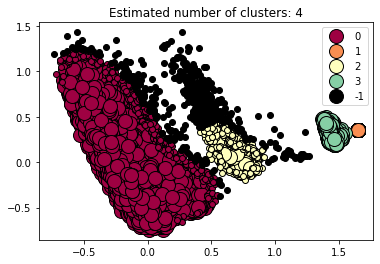

In [176]:
mca_clusters = DBSCAN(eps=0.1, min_samples=100).fit(customer_mca_results)
DBSCAN_processing(mca_clusters, customer_mca_results)

Note that the clusters have different labels between general population and customers!

In [177]:
cust_clustered_mca = customer_mca_results.copy(deep=True)
cust_clustered_mca.loc[:,'Cluster'] = mca_clusters.labels_ # append labels to points
## Change cluster labels:
cust_clustered_mca[cust_clustered_mca['Cluster']==2]['Cluster'] = 100
cust_clustered_mca[cust_clustered_mca['Cluster']==3]['Cluster'] = 2
cust_clustered_mca[cust_clustered_mca['Cluster']==100]['Cluster'] = 3
total = cust_clustered_mca.shape[0]

temp = cust_clustered_mca.groupby('Cluster').size().to_frame()
temp.columns = ["customer_DBSCAN_size"]
DBSCAN_clust_sizes["customer_DBSCAN_size"] = temp["customer_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_customers'] = 100*(DBSCAN_clust_sizes["customer_DBSCAN_size"]/total)
DBSCAN_clust_sizes['percentage_difference'] = 100*(DBSCAN_clust_sizes['percentage_of_customers']-DBSCAN_clust_sizes['percentage_of_pop'])/DBSCAN_clust_sizes['percentage_of_pop']
DBSCAN_clust_sizes[['percentage_of_pop', 'percentage_of_customers', 'percentage_difference']]

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,percentage_of_pop,percentage_of_customers,percentage_difference
Cluster,,,
-1,1.956912,1.119813,-42.776514
0,88.904847,89.284352,0.426866
1,5.143627,4.995400,-2.881761
2,3.096948,1.420525,-54.131464
3,0.897666,3.179911,254.242050


We can see that the main differences are that cluster 2 is under-represented in the customer population, while cluster 3 is significantly over-represented.

In [178]:
## Cleanup
del mca_clusters, total, cust_clustered_mca, temp
gc.collect()

17759

Estimated number of clusters: 2
Estimated number of noise points: 329


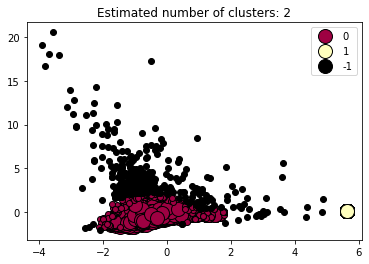

In [179]:
pca_clusters = DBSCAN(eps=0.5, min_samples=100).fit(gen_pop_pca_results)
DBSCAN_processing(pca_clusters, gen_pop_pca_results)

In [180]:
pop_clustered_pca = gen_pop_pca_results.copy(deep=True)
pop_clustered_pca['Cluster'] = pca_clusters.labels_ # append labels to points
total = pop_clustered_pca.shape[0]

DBSCAN_clust_sizes = pop_clustered_pca.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["general_population_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_pop'] = 100*(DBSCAN_clust_sizes["general_population_DBSCAN_size"]/total)
DBSCAN_clust_sizes

,general_population_DBSCAN_size,percentage_of_pop
Cluster,,
-1,329,5.906643
0,4795,86.086176
1,446,8.007181


Estimated number of clusters: 2
Estimated number of noise points: 577


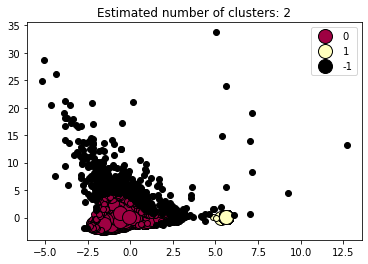

In [181]:
pca_clusters = DBSCAN(eps=0.5, min_samples=100).fit(customer_pca_results)
DBSCAN_processing(pca_clusters, customer_pca_results)

In [182]:
cust_clustered_pca = customer_pca_results.copy(deep=True)
cust_clustered_pca['Cluster'] = pca_clusters.labels_ # append labels to points
total = cust_clustered_pca.shape[0]

temp = cust_clustered_pca.groupby('Cluster').size().to_frame()
temp.columns = ["customer_DBSCAN_size"]
DBSCAN_clust_sizes["customer_DBSCAN_size"] = temp["customer_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_customers'] = 100*(DBSCAN_clust_sizes["customer_DBSCAN_size"]/total)
DBSCAN_clust_sizes['percentage_difference'] = 100*(DBSCAN_clust_sizes['percentage_of_customers']-DBSCAN_clust_sizes['percentage_of_pop'])/DBSCAN_clust_sizes['percentage_of_pop']
DBSCAN_clust_sizes[['percentage_of_pop', 'percentage_of_customers', 'percentage_difference']]

,percentage_of_pop,percentage_of_customers,percentage_difference
Cluster,,,
-1,5.906643,2.589767,-56.155015
0,86.086176,89.160682,3.571429
1,8.007181,8.249551,3.026906


In [183]:
## Cleanup
del pca_clusters, total, cust_clustered_pca, temp, DBSCAN_clust_sizes, customer_mca_results, gen_pop_pca_results, customer_pca_results
gc.collect()

8185

### Combining principle components

In [117]:
components_df = pd.DataFrame(index=gen_pop_mca_results.index)
components_df['MCA1'] = gen_pop_mca_results['PC1']
components_df['MCA2'] = gen_pop_mca_results['PC2']
components_df['MCA_clust'] = pop_clustered_mca.loc[:,'Cluster']
components_df['PCA1'] = gen_pop_mca_results['PC1']
components_df['PCA_clust'] = pop_clustered_pca.loc[:,'Cluster']
components_df.head()

,MCA1,MCA2,MCA_clust,PCA1,PCA_clust
970282,0.028024,-0.312879,0,0.028024,0.0
405811,1.653643,0.350930,1,1.653643,1.0
246177,-0.386732,0.288953,0,-0.386732,0.0
797974,0.047031,-0.273319,0,0.047031,0.0
792458,-0.155619,0.991678,-1,-0.155619,0.0


In [118]:
#interactive plotting in separate window
%matplotlib qt 

In [119]:
clusters_3dplot(components_df, 'MCA_clust', 'MCA1', 'MCA2', 'PCA1', components_df['MCA_clust'].unique().tolist())

c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:893: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(cluster_labels))]
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length 

In [120]:
# magic word for producing visualizations in notebook
%matplotlib inline

In [121]:
## Cleanup
del pop_clustered_mca, gen_pop_mca_results, pop_clustered_pca
gc.collect()

4438

### Output as pickle

In [122]:
filename = 'genpop_clusters'
outfile = open(filename,'wb')
pickle.dump(components_df,outfile)
outfile.close()

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

### Customer segmentation

#### Data import

In [123]:
# mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
## Done on Udacity Servers

In [124]:
filename = 'genpop_clusters'
infile = open(filename,'rb')
components_df = pickle.load(infile)
infile.close()

In [125]:
filename = 'sample_azdias'
infile = open(filename,'rb')
sample_azdias = pickle.load(infile)
infile.close()

#### Data cleaning
Carry out the same cleaning on the mailout_train dataset

In [126]:
# ## Clean
# cleaned_mailout_train = clean_arvato_data(mailout_train)
# ## Writing the prepared data to a csv for speed:
# cleaned_mailout_train.to_csv('cleaned_mailout_train.csv', sep=';')
## Done on Udacity Servers

In [127]:
cleaned_mailout_train = pd.read_csv('cleaned_mailout_train.csv', sep=';')

In [128]:
fraction=1
sample_mailout = tidy_data(cleaned_mailout_train.sample(frac=fraction, replace=False, random_state=1))

#### Data Check

In [129]:
## Information about the data:
label_dist = pd.DataFrame(sample_mailout.groupby('RESPONSE')['AGER_TYP'].count())
label_dist.columns=['count']
print(f'Percentage of positive responses = {((label_dist["count"][1])/(label_dist["count"].sum()))*100}')

Percentage of positive responses = 1.2383036171500394


Considerable class imbalance - will need to use weighting and a metric other than accuracy. </br>
Note formula to calculate weights: wj=n_samples / (n_classes * n_samplesj)

In [130]:
weights = {}
n_samples = sample_mailout.shape[0]
n_classes = 2
for response in [0, 1]:
    n_class = label_dist["count"][response]
    weights[response] = n_samples / (n_classes*n_class)
weights

{0: 0.506269149186896, 1: 40.37781954887218}

In [131]:
## Cleanup
del label_dist
gc.collect()

93

#### Append clusters labels and train a tree model to predict clusters
Using the general population dataset, train a tree model to predict one of four segments, and assess its accuracy. Could train on customers dataset but I am assuming that the marketing campaign is sent out to the general population.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [133]:
rf = RandomForestClassifier(class_weight='balanced')
gbc = GradientBoostingClassifier()

In [134]:
train_cat = prepare_mca(sample_azdias, to_drop, continuous_vars, reduce_columns=True, subsample=1.0)

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of MCA prepared data = 11140 rows, 1389 columns


In [135]:
## Get train test split, but one-hot encoded and so that the test matches the train
X=train_cat
y=components_df['MCA_clust']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
for model, name in zip([rf, gbc], ['Random Forest', 'Gradient Boosting Classifier']):
    
    categories = [-1, 0, 1, 2, 3]
    
    print(f'Fitting {name}...')
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(f'Results for {name}:')
    print(f'Confusion matrix:')
    results = pd.DataFrame(confusion_matrix(y_test, ypred))
    results.columns=categories
    results.index=categories
    print(results)
    
    print(f'Precision and Recall for each class:')
    recalls = []
    precisions = []
    for i, cluster in enumerate(categories):
        recalls.append(results.iloc[i,i]/np.sum(results.iloc[i,:]))
        precisions.append(results.iloc[i,i]/np.sum(results.iloc[:,i]))
    results = pd.DataFrame(index=categories)
    results['Recall'] = recalls
    results['Precision'] = precisions
    
    print(results)
    print('\r')

Fitting Random Forest...
Results for Random Forest:
Confusion matrix:
    -1     0    1    2   3
-1  45    21    0    0   2
 0   0  3267    0    0   0
 1   0     0  178    0   0
 2   0     0    0  126   0
 3  10     0    0    0  28
Precision and Recall for each class:
      Recall  Precision
-1  0.661765   0.818182
 0  1.000000   0.993613
 1  1.000000   1.000000
 2  1.000000   1.000000
 3  0.736842   0.933333

Fitting Gradient Boosting Classifier...
Results for Gradient Boosting Classifier:
Confusion matrix:
    -1     0    1    2   3
-1  45    18    0    0   5
 0   2  3265    0    0   0
 1   0     0  178    0   0
 2   0     0    0  126   0
 3  11     0    0    0  27
Precision and Recall for each class:
      Recall  Precision
-1  0.661765   0.775862
 0  0.999388   0.994517
 1  1.000000   1.000000
 2  1.000000   1.000000
 3  0.710526   0.843750



Good for the segments that are important? rf better for cluster 0, same for 1 and 2 </br>
Which better? Random forest much faster, use this one.

Plot decision function alongside data:
https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py </br>
Can only be done in two dimensions - would have to change approach to transform feature space to PCs, then train classifier based on 2PCs, then plot data points and decision boundaries along those axes. Possible future work.

#### Using trained model, predict clusters (customer segments) for mailout train data and append this as a feature

In [137]:
to_classify = prepare_mca(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]], to_drop, continuous_vars, reduce_columns=True, subsample=1.0)

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of MCA prepared data = 42962 rows, 1406 columns


In [138]:
## Check columns match
to_classify, X = match_ohe_dfs(to_classify, X_train, 'mailout', 'model_trained')

Checking mailout and model_trained match...
in mailout but not model_trained:
{'TITEL_KZ_5.0', 'D19_VERSI_ONLINE_DATUM_1', 'D19_TELKO_ONLINE_DATUM_2', 'D19_BANKEN_ONLINE_QUOTE_12_9.0', 'TITEL_KZ_3.0', 'D19_VERSI_ANZ_12_6', 'ANZ_KINDER_6.0', 'D19_LOTTO_2.0', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_HANDWERK_1', 'D19_LOTTO_4.0', 'D19_HANDWERK_2', 'D19_BANKEN_OFFLINE_DATUM_3', 'D19_REISEN_1', 'D19_TELKO_ANZ_12_5', 'TITEL_KZ_4.0', 'D19_TELKO_ANZ_24_5'}
no columns in model_trained that are not in mailout

no columns in mailout that are not in model_trained
no columns in model_trained that are not in mailout
...mailout and model_trained now match
Matching column order...
...done


In [139]:
sample_mailout['customer_segment'] = rf.predict(to_classify)
# sample_mailout['customer_segment'].unique().tolist()
sample_mailout.groupby('customer_segment')['AGER_TYP'].count()

customer_segment
-1      734
 0    35185
 1     5772
 2     1197
 3       74
Name: AGER_TYP, dtype: int64

All segments have been predicted here - good

In [140]:
sample_mailout.groupby('customer_segment')['RESPONSE'].sum()

customer_segment
-1      7
 0    417
 1     87
 2     21
 3      0
Name: RESPONSE, dtype: int64

Majority seem to be from group 0, which is surprising given previous analysis! Could look to split the overall predictive model into this initial segmentation step, then 5 separate models trained on each segment to increase performance.

#### Output as pickle

In [141]:
filename = 'mailout_train_clusters'
outfile = open(filename,'wb')
pickle.dump(sample_mailout,outfile)
outfile.close()

In [142]:
## Cleanup
del cleaned_mailout_train, sample_mailout, train_cat, X, y, X_train, X_test, y_train, y_test, results, to_classify
gc.collect()

141

### Classification Initial Approach

#### Package Imports

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### Trial different classification models and parameters

Trial a range of model types. Use following metrics to judge:
* Recall
* ROC AUC
* F1 score (harmonic mean of precision and recall: f1 score = 2*(precision*recall)/(precision+recall))

In [9]:
filename = 'mailout_train_clusters'
infile = open(filename,'rb')
sample_mailout = pickle.load(infile)
infile.close()

##### Get train and test sets

In [186]:
to_drop = []
for col in sample_mailout.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


##### Instantiate models

In [187]:
rf = RandomForestClassifier(class_weight='balanced')
gbc = GradientBoostingClassifier()
lr = LogisticRegression(class_weight='balanced', max_iter=150)
lgbm = LGBMClassifier(class_weight='balanced')
nn = MLPClassifier()
# svc = SVC() #(kernel='linear', probability=True, random_state=random_state)
ada = AdaBoostClassifier() # keep as decision tree base classifier
# cnb = CategoricalNB() # does not predict?

In [188]:
test_size= 0.33
randomstate = 1

model_list = [rf, gbc, lr, lgbm, nn, ada] #, cnb, svc
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'LGBMClassifier',
               'MLPClassifier', 'AdaBoostClassifier'] # , 'CategoricalNaiveBayes', 'SupportVectorClassifier'

##### Test each baseline model
Using non-tuned parameters, see how each type of model performs

In [199]:
resultsdf = pd.DataFrame(columns=['train_test', 'scaler', 'Accuracy', 'F1_scores', 'Precision', 'Recall', 'AUC', 'Runtime_s'])

for scaler, scaler_approach in zip([MinMaxScaler(feature_range=(0, 1)), StandardScaler()],['MinMaxScaler', 'StandardScaler']):        
    for train_test_approach in ['matching_ohe', 'split_ohe', 'split']:
        
        if train_test_approach == 'matching_ohe':
            ## Do custom matching train test split (removing columns/adding dummies) for df with all categorical columns one-hot-encoded:
            X = sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]]
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = get_matching_ohe_traintest(X, y, to_drop, continuous_vars,
                                                                        scaler, test_size=test_size,
                                                                        random_state=randomstate, scale=False)

        if train_test_approach == 'split_ohe':
            ## Do regular train test split for df with all categorical columns one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)

        if train_test_approach == 'split':
            ## Do regular train test split for df with only categorical columns with string values one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=False)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)
        
        traincolumns = Xtrain.columns
        testcolumns = Xtest.columns
        Xtrain = pd.DataFrame(data=scaler.fit_transform(Xtrain), columns=traincolumns)
        Xtest = pd.DataFrame(data=scaler.transform(Xtest), columns=testcolumns)
            
        baseline_model_performances = test_models(model_list, model_names, Xtrain, y_train, Xtest, y_test, printout=False)

        baseline_model_performances['train_test'] = train_test_approach
        baseline_model_performances['scaler'] = scaler_approach
        baseline_model_performances = baseline_model_performances[resultsdf.columns]
        resultsdf = resultsdf.append(baseline_model_performances)

Getting train test split...
...done
One-hot encoding categorical X data and dropping columns to drop...
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 28784 rows, 1417 columns
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 14178 rows, 1405 columns
...done
Checking train and test match...
in train but not test:
{'D19_TELKO_ANZ_12_6', 'D19_BANKEN_ONLINE_QUOTE_12_2.0', 'D19_VERSI_ANZ_12_6', 'D19_TELKO_ANZ_24_6', 'D19_LOTTO_2.0', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_HANDWERK_1', 'D19_LOTTO_4.0', 'D19_TELKO_ONLINE_DATUM_1', 'D19_VERSI_ANZ_24_6', 'D19_HANDWERK_2', 'D19_VERSI_OFFLINE_DATUM_1', 'D19_TELKO_ANZ_12_5', 'D19_WEIN_FEINKOST_1'}
in test but not train:
{'D19_TIERARTIKEL_1', 'ALTERSKATEGORIE_FEIN_2.0'}

no columns in train that are not in test
no co

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 14.437936300004367
Fitting model LGBMClassifier(class_weight='balanced')
Run time in seconds: 30.544552899998962
Fitting model MLPClassifier()
Run time in seconds: 457.0724229000043
Fitting model AdaBoostClassifier()


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 46.9705552000014
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1419 columns
Fitting model RandomForestClassifier(class_weight='balanced')
Run time in seconds: 27.968378800003848
Fitting model GradientBoostingClassifier()
Run time in seconds: 105.99834750000446
Fitting model LogisticRegression(class_weight='balanced', max_iter=150)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 10.486839800003509
Fitting model LGBMClassifier(class_weight='balanced')
Run time in seconds: 9.773692299997492
Fitting model MLPClassifier()
Run time in seconds: 348.7464093000017
Fitting model AdaBoostClassifier()


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 57.631665000000794
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 263 columns
Fitting model RandomForestClassifier(class_weight='balanced')
Run time in seconds: 8.733623699998134
Fitting model GradientBoostingClassifier()
Run time in seconds: 35.17340399999375
Fitting model LogisticRegression(class_weight='balanced', max_iter=150)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.8467711999983294
Fitting model LGBMClassifier(class_weight='balanced')
Run time in seconds: 2.9188948000009987
Fitting model MLPClassifier()
Run time in seconds: 81.43104630000016
Fitting model AdaBoostClassifier()


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:983: RuntimeWarning: invalid value encountered in longlong_scalars
  precisions.append(round(precision, 3))
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.749706299997342
Getting train test split...
...done
One-hot encoding categorical X data and dropping columns to drop...
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 28784 rows, 1417 columns
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 14178 rows, 1405 columns
...done
Checking train and test match...
in train but not test:
{'D19_TELKO_ANZ_12_6', 'D19_BANKEN_ONLINE_QUOTE_12_2.0', 'D19_VERSI_ANZ_12_6', 'D19_TELKO_ANZ_24_6', 'D19_LOTTO_2.0', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_HANDWERK_1', 'D19_LOTTO_4.0', 'D19_TELKO_ONLINE_DATUM_1', 'D19_VERSI_ANZ_24_6', 'D19_HANDWERK_2', 'D19_VERSI_OFFLINE_DATUM_1', 'D19_TELKO_ANZ_12_5', 'D19_WEIN_FEINKOST_1'}
in test but not train:
{'D19_TIERARTIKEL_1', 'ALTERSKATEGORIE_FEIN_2.0'}

no columns in train that are not in test
no columns in test that are not in train
...train and test now match
Matching column order...
...done
Training dataset = (28784, 1405), testing dataset = (14178, 1405)
Fitting model RandomForestClassifier(class_weight='balanced')
Run time in seconds: 

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 12.083057299998472
Fitting model LGBMClassifier(class_weight='balanced')
Run time in seconds: 27.29153999999835
Fitting model MLPClassifier()
Run time in seconds: 358.4720285000003
Fitting model AdaBoostClassifier()


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 53.78660330000275
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1419 columns
Fitting model RandomForestClassifier(class_weight='balanced')
Run time in seconds: 25.916102499999397
Fitting model GradientBoostingClassifier()
Run time in seconds: 111.19617310000467
Fitting model LogisticRegression(class_weight='balanced', max_iter=150)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 14.17033100000117
Fitting model LGBMClassifier(class_weight='balanced')
Run time in seconds: 28.751262400000996
Fitting model MLPClassifier()
Run time in seconds: 404.0482125999988
Fitting model AdaBoostClassifier()


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 45.15988320000179
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 263 columns
Fitting model RandomForestClassifier(class_weight='balanced')
Run time in seconds: 9.432665600004839
Fitting model GradientBoostingClassifier()
Run time in seconds: 38.07573840000259
Fitting model LogisticRegression(class_weight='balanced', max_iter=150)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 3.6483136999959243
Fitting model LGBMClassifier(class_weight='balanced')
Run time in seconds: 4.599897499996587
Fitting model MLPClassifier()
Run time in seconds: 57.384207900002366
Fitting model AdaBoostClassifier()


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:983: RuntimeWarning: invalid value encountered in longlong_scalars
  precisions.append(round(precision, 3))
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 14.122865099998307


In [200]:
resultsdf

,train_test,scaler,Accuracy,F1_scores,Precision,Recall,AUC,Runtime_s
RandomForestClassifier,matching_ohe,MinMaxScaler,0.926,0.022,0.013,0.066,0.501,25
GradientBoostingClassifier,matching_ohe,MinMaxScaler,0.983,0.000,0.000,0.000,0.513,119
LogisticRegression,matching_ohe,MinMaxScaler,0.786,0.031,0.017,0.268,0.526,14
LGBMClassifier,matching_ohe,MinMaxScaler,0.894,0.025,0.014,0.104,0.512,31
MLPClassifier,matching_ohe,MinMaxScaler,0.986,0.010,0.056,0.005,0.528,457
AdaBoostClassifier,matching_ohe,MinMaxScaler,0.987,0.000,0.000,0.000,0.497,47
RandomForestClassifier,split_ohe,MinMaxScaler,0.905,0.027,0.016,0.104,0.502,28
GradientBoostingClassifier,split_ohe,MinMaxScaler,0.985,0.000,0.000,0.000,0.537,106
LogisticRegression,split_ohe,MinMaxScaler,0.739,0.029,0.015,0.306,0.523,10
LGBMClassifier,split_ohe,MinMaxScaler,0.842,0.030,0.016,0.191,0.532,10


Due to the use of this model (trying to focus marketing to those more likely to respond), maximising the recall is more important than minimising the false positive rate. Therefore Recall and ROC AUC are the most important metrics to consider. In this case, the top performer is Logistic Regression, though none are doing particularly well

In [201]:
## Cleanup
del rf, gbc, lgbm, nn, ada, lr
gc.collect()

224

#### Hyperparameter Tuning
Take forwards most promising models and tune hyperparameters using GridSearchCV

In [4]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [5]:
# rf = RandomForestClassifier(class_weight='balanced')
gbc = GradientBoostingClassifier()
# lr = LogisticRegression(class_weight='balanced', max_iter=150)
# lgbm = LGBMClassifier(class_weight='balanced')
# nn = MLPClassifier()
# # svc = SVC() #(kernel='linear', probability=True, random_state=random_state)
# ada = AdaBoostClassifier() # keep as decision tree base classifier
# cnb = CategoricalNB() # does not predict?

##### Get train and test sets

In [6]:
filename = 'mailout_train_clusters'
infile = open(filename,'rb')
sample_mailout = pickle.load(infile)
infile.close()

In [7]:
to_drop = []
for col in sample_mailout.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


In [8]:
test_size= 0.33
randomstate = 1

In [9]:
X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                    to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
y = sample_mailout['RESPONSE']
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)

## Scale
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1419 columns


In [13]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

##### Find Best Params

In [10]:
param_grid = {'learning_rate': [0.1, 0.01],
              'max_depth': [3, 5, 10],
              'max_features': [None, 100],
              'n_estimators': [100, 1000],
              'random_state': [1]
             }
gridsearch = GridSearchCV(estimator= gbc, 
                          param_grid = param_grid,
                          cv=StratifiedKFold(3), 
                          n_jobs=-1, 
                          scoring='roc_auc', 
                          verbose=2).fit(Xtrain, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [11]:
gridsearch.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': None,
 'n_estimators': 100,
 'random_state': 1}

##### Evaluate best estimator

Fitting model GradientBoostingClassifier(learning_rate=0.01, max_depth=10, random_state=1)
       0  1
0  13994  1
1    183  0


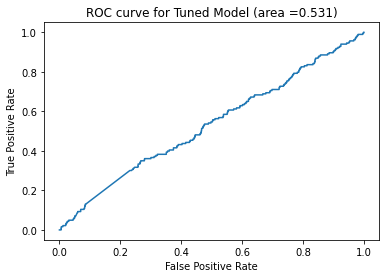

Run time in seconds: 317.900014999992



In [12]:
best_model_performance = test_models([gridsearch.best_estimator_], ['Tuned Model'], Xtrain, y_train, Xtest, y_test)

In [13]:
best_model_performance.head()

,Accuracy,F1_scores,Precision,Recall,AUC,Runtime_s
Tuned Model,0.987,0.0,0.0,0.0,0.531,318


Instead of ROC, look at ranked predicted probabilities to see if the model is picking up positive responses where you would expect, and potentially find a good threshold to use.

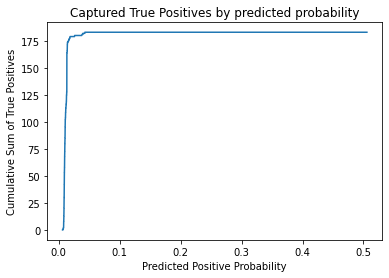

In [14]:
ranked_predictions = pd.DataFrame(y_test)
ranked_predictions['Positive_resp_prob'] = gridsearch.best_estimator_.predict_proba(Xtest)[:,1]
ranked_predictions.sort_values('Positive_resp_prob', inplace=True, ascending=True)
ranked_predictions['cumulative_response'] = ranked_predictions['RESPONSE'].cumsum()
plt.plot(ranked_predictions['Positive_resp_prob'], ranked_predictions['cumulative_response'])
plt.title('Captured True Positives by predicted probability');
plt.xlabel('Predicted Positive Probability');
plt.ylabel('Cumulative Sum of True Positives');

Interesting this makes it look like by lowering the threshold, most of the positive class could be captured, as long as we are not too worried about the False positive rate (see ROC)

##### Output best estimator as pickle

In [15]:
filename = 'baseline_model'
outfile = open(filename,'wb')
pickle.dump(gridsearch.best_estimator_,outfile)
outfile.close()

### Classification Under/Oversampling Approach

Since the data is categorical, use SMOTE-NC rather than SMOTE (https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5)

#### Package imports

In [13]:
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc

from sklearn.model_selection import train_test_split

In [4]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from operator import itemgetter

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### Trial different classification models and parameters

As before, but to simultaneously tune parameters for over/under sampling, set this up as a pipeline with parameters to cycle through.

##### Get train and test sets

In [5]:
filename = 'mailout_train_clusters'
infile = open(filename,'rb')
sample_mailout = pickle.load(infile)
infile.close()

In [6]:
to_drop = []
for col in sample_mailout.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


##### Instantiate models

In [10]:
randomstate=42
test_size=0.33
rf = RandomForestClassifier(random_state=randomstate)
gbc = GradientBoostingClassifier(random_state=randomstate)
lr = LogisticRegression(random_state=randomstate, max_iter=250)
lgbm = LGBMClassifier(random_state=randomstate)
nn = MLPClassifier(random_state=randomstate)
ada = AdaBoostClassifier(random_state=randomstate) # keep as decision tree base classifier

In [11]:
under_ratios = [0.1, 0.2, 0.3] # note undersampling precedes oversampling
over_ratios = [0.5, 0.5, 0.5]

model_list = [rf, gbc, lr, lgbm, nn, ada] #, cnb, svc
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'LGBMClassifier',
               'MLPClassifier', 'AdaBoostClassifier'] # , 'CategoricalNaiveBayes', 'SupportVectorClassifier'
# XGBoost? KNeighboursClassifier?

##### Test each baseline model

In [17]:
resultsdf = pd.DataFrame(columns=['train_test', 'resample', 'scaler', 'Accuracy', 'F1_scores', 'Precision', 'Recall', 'AUC', 'Runtime_s'])

for scaler, scaler_approach in zip([MinMaxScaler(feature_range=(0, 1)), StandardScaler()],['MinMaxScaler', 'StandardScaler']):        
    for train_test_approach in ['matching_ohe', 'split_ohe', 'split']:
        
        if train_test_approach == 'matching_ohe':
            ## Do custom matching train test split (removing columns/adding dummies) for df with all categorical columns one-hot-encoded:
            X = sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]]
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = get_matching_ohe_traintest(X, y, to_drop, continuous_vars,
                                                                        scaler, test_size=test_size,
                                                                        random_state=randomstate, scale=False)

        if train_test_approach == 'split_ohe':
            ## Do regular train test split for df with all categorical columns one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)

        if train_test_approach == 'split':
            ## Do regular train test split for df with only categorical columns with string values one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=False)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)
            
        traincolumns = Xtrain.columns
        testcolumns = Xtest.columns
        Xtrain = pd.DataFrame(data=scaler.fit_transform(Xtrain), columns=traincolumns)
        Xtest = pd.DataFrame(data=scaler.transform(Xtest), columns=testcolumns)

        # for ros, rosname in zip([RandomOverSampler(), SMOTE(), SMOTENC(categorical_features=[x for x in Xtrain.columns if x not in continuous_vars])],
        #                         ['ROS', 'SMOTE', 'SMOTENC']): ## Need to find a way to determine cat cols for ohe arrays
        for ros, rosname in zip([RandomOverSampler(), SMOTE()],
                                ['ROS', 'SMOTE']):
            print(rosname)
            i=0
            for under_samp, over_samp in zip(under_ratios, over_ratios):

                print(f'for sample ratio {i+1} in {len(under_ratios)}...')

                rus = RandomUnderSampler(sampling_strategy = under_samp, random_state=randomstate)
                ros.set_params(sampling_strategy=over_samp, random_state=randomstate)

                X_, y_ = rus.fit_resample(Xtrain, y_train)
                X_res, y_res = ros.fit_resample(X_, y_)

                ## Test on resampled test set:
                # Xtrain_resamp, Xtest_resamp, y_train_resamp, y_test_resamp = train_test_split(X_res, y_res, test_size=0.2, random_state=1)
                # baseline_model_performances = test_models(model_list, model_names, Xtrain_resamp, y_train_resamp, Xtest_resamp, y_test_resamp, printout=False)

                ## Test on non-resampled test set:
                baseline_model_performances = test_models(model_list, model_names, X_res, y_res, Xtest, y_test, printout=False)
                
                baseline_model_performances['train_test'] = train_test_approach
                baseline_model_performances['resample'] = str('(' + str(under_samp) + ',' + str(over_samp)+ ') ' + rosname)
                baseline_model_performances['scaler'] = scaler_approach
                baseline_model_performances = baseline_model_performances[resultsdf.columns]
                resultsdf = resultsdf.append(baseline_model_performances)

                i+=1

Getting train test split...
...done
One-hot encoding categorical X data and dropping columns to drop...
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 28784 rows, 1417 columns
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 14178 rows, 1405 columns
...done
Checking train and test match...
in train but not test:
{'D19_TELKO_ANZ_24_6', 'D19_VERSI_OFFLINE_DATUM_1', 'D19_HANDWERK_1', 'D19_WEIN_FEINKOST_1', 'D19_TELKO_ANZ_12_6', 'D19_BANKEN_ONLINE_QUOTE_12_2.0', 'D19_LOTTO_4.0', 'D19_HANDWERK_2', 'D19_VERSI_ANZ_24_6', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_TELKO_ONLINE_DATUM_1', 'D19_TELKO_ANZ_12_5', 'D19_VERSI_ANZ_12_6', 'D19_LOTTO_2.0'}
in test but not train:
{'D19_TIERARTIKEL_1', 'ALTERSKATEGORIE_FEIN_2.0'}

no columns in train that are not in test
no columns in test that are not in train
...train and test now match
Matching column order...
...done
Training dataset = (28784, 1405), testing dataset = (14178, 1405)
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.983243399999992
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.490907899999911
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 34.4441847999999
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 13.419146899999987
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.2270094000000427
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 8.09881919999998
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.7108702000000449
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.014436299999943
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 18.926194600000144
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.792716800000107
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.8877831999998307
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.352213799999845
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9960301999999501
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.190917200000058
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 28.220232099999976
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.256611700000121
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.48168869999995
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 20.602738699999918
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.105445199999849
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 8.585659600000099
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 49.16710510000007
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 25.89634860000001
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 6.211906699999872
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 16.88081269999998
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 3.9362094000000525
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 10.868292500000052
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 19.92912729999989
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.456066199999896
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.481244800000013
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.766832000000022
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.137052100000119
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.2298914000000423
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 19.812480899999855
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.90980750000017
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1419 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.4919277999997576
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 17.843956300000173
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.356128799999624
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.608461299999817
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 51.39340470000025
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 13.611146700000063
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.628648400000202
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 9.33762119999983
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.0785588999997344
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.5584021999998185
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 35.39214899999979
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.633203800000047
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.3601747000002433
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 6.949183899999753
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.1997802999999294
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.613627599999745
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 18.51680299999998
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.286880099999962
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.807387500000004
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 23.388247099999717
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.3487675999999738
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 9.095495100000335
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 68.4639029
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 15.129999000000225
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.8892408000001524
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 9.799935999999889
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.3347884999998314
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.8752863999998226
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 33.05082679999987
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.461386200000106
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.05883410000024
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.867776099999901
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.7165048000001661
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 4.470162999999957
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 18.740707700000257
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.310034900000119
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 263 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.9386379000002307
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.086917300000096
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9925195999999232
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.0917497000000367
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 12.055576399999609
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 3.1018198000001576
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.6642867999998998
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.5483328000000256
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.25184340000032535
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.6654991999998856
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 5.481969099999787
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.464186400000017
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.3449038000003384
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 1.9084593999996287
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.220210699999825
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.6790406999998595
Fitting model MLPClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Run time in seconds: 5.176441200000227
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.429354500000045
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.373508700000002
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 8.38763629999994
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.3837069999999585
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 4.197173499999735
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 24.686908599999697
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 3.4930160999997497
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.3722382999999354
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 3.3698159000000487
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.2686062999996466
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.4160985000003166
Fitting model MLPClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Run time in seconds: 7.907868400000098
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.8792819000000236
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.238611299999775
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.2340272999999797
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.21603520000007848
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.7937853000003088
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 4.529743600000074
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.1777305000000524
Getting train test split...
...done
One-hot encoding categorical X data and dropping columns to drop...
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 28784 rows, 1417 columns
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 14178 rows, 1405 columns
...done
Checking train and test match...
in train but not test:
{'D19_TELKO_ANZ_24_6', 'D19_VERSI_OFFLINE_DATUM_1', 'D19_HANDWERK_1', 'D19_WEIN_FEINKOST_1', 'D19_TELKO_ANZ_12_6', 'D19_BANKEN_ONLINE_QUOTE_12_2.0', 'D19_LOTTO_4.0', 'D19_HANDWERK_2', 'D19_VERSI_ANZ_24_6', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_TELKO_ONLINE_DATUM_1', 'D19_TELKO_ANZ_12_5', 'D19_VERSI_ANZ_12_6', 'D19_LOTTO_2.0'}
in test but not train:
{'D19_TIERARTIKEL_1', 'ALTERSKATEGORIE_FEIN_2.0'}

no columns in train that are not in test
no columns in test that are not in train
...train and test now match
Matching column order...
...done
Training dataset = (28784, 1405), testing dataset = (14178, 1405)
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 11.844095200000083
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 6.809343100000206
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 30.876451800000268
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 15.352380399999674
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.7987435999998524
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 9.167416299999786
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.4215933000000405
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.7832336999999825
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 18.382304199999908
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.17481429999998
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.8089532999997573
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.848079899999902
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.6944377999998324
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.4697636000000784
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 11.1358823999999
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.315256700000191
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.194310500000029
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 25.53796969999985
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 4.279296899999736
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 11.910165300000244
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 28.067219199999727
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 14.41222259999995
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.3344663999996556
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 10.055361899999752
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9893496999998206
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.7683445999996366
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 12.977247900000293
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.716000100000201
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.072713500000191
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.223158499999954
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.0947648999999728
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.411741500000062
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 10.889690399999836
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.017251300000225
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1419 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.335106600000017
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 16.668538700000227
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.4643879999998717
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.6375512999998136
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 31.415076999999656
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 16.662744199999906
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 3.791983000000073
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 9.442926799999896
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.1279388000002655
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.8945536999999604
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 16.764136999999664
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.455196899999919
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.5763812999998663
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 6.432923200000005
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.7666616000001341
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.8081335000001673
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 17.15352329999996
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.128054399999655
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.830695099999957
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 22.655362200000127
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.2020151000001533
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 7.77417800000012
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 26.479902999999922
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 15.254510700000083
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.6771456999999828
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 11.25209040000027
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.491501900000003
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.820412800000213
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 15.285075000000234
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.563349900000048
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.2482786999999007
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.2093470000004345
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9856431000002885
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.2737849000000097
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 12.917138299999806
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.67664620000005
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 263 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.00838210000029
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.998502899999949
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.5786872999997286
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.0758946999999353
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 14.034968500000105
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 3.6659276999998838
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.3729914999998982
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.895740399999795
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.4101519000000735
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.6587011999999959
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 4.837936599999921
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.5744504999997844
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.246156400000018
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 1.8700007000002188
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.1914563000000271
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.5964434000002257
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 3.074750000000222
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.359495600000173
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.354757200000222
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 8.305359599999974
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.6351660000000265
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 4.346558400000049
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 9.399175999999898
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 3.6840895000000273
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.6554465999997774
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 3.6581952999999885
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.2401196999999229
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.557174600000053
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 4.4518822
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.569379300000037
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.2813681000002362
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.6228319000001648
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.4477665999997953
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.7796962000002168
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 3.2008866000001035
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.733607099999972


In [18]:
pd.options.display.max_rows=216
resultsdf

,train_test,resample,scaler,Accuracy,F1_scores,Precision,Recall,AUC,Runtime_s
RandomForestClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.980,0.027,0.036,0.022,0.504,5
GradientBoostingClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.975,0.022,0.023,0.022,0.472,15
LogisticRegression,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.853,0.031,0.017,0.180,0.529,2
LGBMClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.982,0.016,0.027,0.011,0.508,2
MLPClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.966,0.021,0.017,0.027,0.528,34
AdaBoostClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.881,0.025,0.014,0.120,0.506,13
RandomForestClassifier,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.979,0.027,0.034,0.022,0.509,2
GradientBoostingClassifier,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.956,0.019,0.013,0.033,0.491,8
LogisticRegression,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.816,0.030,0.016,0.224,0.523,2
LGBMClassifier,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.967,0.025,0.020,0.033,0.510,3


https://stackoverflow.com/questions/50285973/pipeline-multiple-classifiers

#### Hyperparameter Tuning

##### Get train and test sets

In [19]:
to_drop = []
for col in sample_mailout.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


In [20]:
filename = 'mailout_train_clusters'
infile = open(filename,'rb')
sample_mailout = pickle.load(infile)
infile.close()

In [21]:
test_size= 0.33
randomstate = 1

In [22]:
X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                    to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
y = sample_mailout['RESPONSE']
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)

scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1419 columns


##### Pipeline

Use imblearn's pipeline to ensure that only train folds are under/oversampled (not test). See https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

In [23]:
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline, make_pipeline

pipeline = make_pipeline(
    RandomUnderSampler(sampling_strategy = 0.1, random_state=randomstate),
    SMOTE(sampling_strategy = 0.5, random_state=randomstate),
    # MinMaxScaler(feature_range=(0, 1)),
    LogisticRegression(random_state=randomstate, max_iter=250)
)
pipeline.get_params()

{'memory': None,
 'steps': [('randomundersampler',
   RandomUnderSampler(random_state=1, sampling_strategy=0.1)),
  ('smote', SMOTE(random_state=1, sampling_strategy=0.5)),
  ('logisticregression', LogisticRegression(max_iter=250, random_state=1))],
 'verbose': False,
 'randomundersampler': RandomUnderSampler(random_state=1, sampling_strategy=0.1),
 'smote': SMOTE(random_state=1, sampling_strategy=0.5),
 'logisticregression': LogisticRegression(max_iter=250, random_state=1),
 'randomundersampler__random_state': 1,
 'randomundersampler__replacement': False,
 'randomundersampler__sampling_strategy': 0.1,
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 1,
 'smote__sampling_strategy': 0.5,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 250,
 'l

In [24]:
param_grid = {'logisticregression__fit_intercept': [True, False],
              'logisticregression__solver': ['newton-cg', 'sag','saga', 'lbfgs'], # 
              'logisticregression__max_iter': [100, 200, 300],
             }

gridsearch = GridSearchCV(estimator= pipeline, 
                          param_grid = param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='roc_auc', 
                          verbose=2).fit(Xtrain, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
gridsearch.best_params_

{'logisticregression__fit_intercept': False,
 'logisticregression__max_iter': 100,
 'logisticregression__solver': 'lbfgs'}

In [26]:
param_grid = {'logisticregression__fit_intercept': [False],
              'logisticregression__solver': ['lbfgs'], # 
              'logisticregression__max_iter': [100],
              'logisticregression__penalty': ['l2', 'none'], # 'l2', 'l1', 'elasticnet' note not all solvers support all algorithms: ‘newton-cg’ - [‘l2’, ‘none’] ‘lbfgs’ - [‘l2’, ‘none’] ‘sag’ - [‘l2’, ‘none’] ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]
             }
gridsearch = GridSearchCV(estimator= pipeline, 
                          param_grid = param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='roc_auc', 
                          verbose=2).fit(Xtrain, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
gridsearch.best_params_

{'logisticregression__fit_intercept': False,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'lbfgs'}

##### Evaluate best estimator

Fitting model Pipeline(steps=[('randomundersampler',
                 RandomUnderSampler(random_state=1, sampling_strategy=0.1)),
                ('smote', SMOTE(random_state=1, sampling_strategy=0.5)),
                ('logisticregression',
                 LogisticRegression(fit_intercept=False, penalty='none',
                                    random_state=1))])


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


       0     1
0  12097  1898
1    155    28


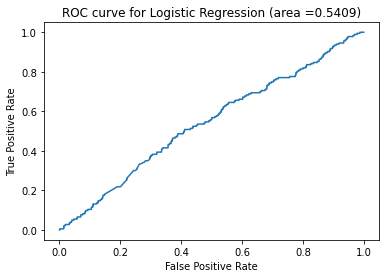

Run time in seconds: 3.7718067999994673



In [28]:
logreg_model_performance = test_models([gridsearch.best_estimator_], ['Logistic Regression'], Xtrain, y_train, Xtest, y_test)

In [29]:
logreg_model_performance.head()

,Accuracy,F1_scores,Precision,Recall,AUC,Runtime_s
Logistic Regression,0.855,0.027,0.015,0.153,0.541,4


Instead of ROC, look at ranked predicted probabilities to see if the model is picking up positive responses where you would expect, and potentially find a good threshold to use.

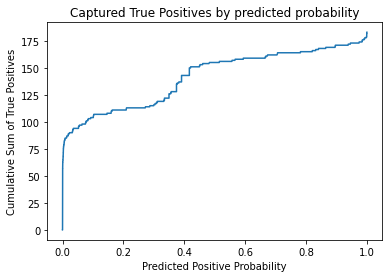

In [30]:
ranked_predictions = pd.DataFrame(y_test)
ranked_predictions['Positive_resp_prob'] = gridsearch.best_estimator_.predict_proba(Xtest)[:,1]
ranked_predictions.sort_values('Positive_resp_prob', inplace=True, ascending=True)
ranked_predictions['cumulative_response'] = ranked_predictions['RESPONSE'].cumsum()
plt.plot(ranked_predictions['Positive_resp_prob'], ranked_predictions['cumulative_response']);
plt.title('Captured True Positives by predicted probability');
plt.xlabel('Predicted Positive Probability');
plt.ylabel('Cumulative Sum of True Positives');

Worse? The vast majority of positive responses are classified as 0 (false negatives).

##### Output best estimator as pickle

In [31]:
filename = 'resampled_model'
outfile = open(filename,'wb')
pickle.dump(gridsearch.best_estimator_,outfile)
outfile.close()

### Feature Reduction
Due to size of dataset, and categorical variables with multiple classes, the resulting training sets will be sparse. Look to reduce the feature space by dropping columns that had large nulls, and that have a lot of 'unknown'. Below we can see there are a few with over 10% unknown, and these are dropped to see the effect this has on performance.

In [242]:
filename = 'mailout_train_clusters'
infile = open(filename,'rb')
sample_mailout = pickle.load(infile)
infile.close()

In [53]:
to_drop = []
for col in sample_mailout.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


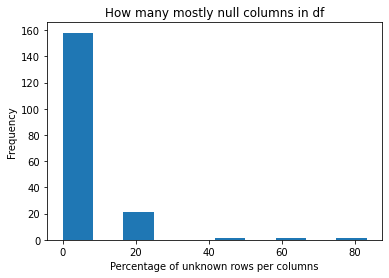

In [56]:
result = unknown_check(sample_mailout.drop(labels=to_drop, axis=1))

In [57]:
result.sort_values('pc_rows_unknown', ascending=False).head(20)

,0,pc_rows_unknown
TITEL_KZ,35780,83.282901
KK_KUNDENTYP,25316,58.926493
AGER_TYP,17963,41.811368
KKK,9930,23.113449
REGIOTYP,9930,23.113449
ALTERSKATEGORIE_FEIN,8155,18.981891
PLZ8_ANTG4,8153,18.977236
PLZ8_ANTG1,8153,18.977236
PLZ8_ANTG2,8153,18.977236
PLZ8_ANTG3,8153,18.977236


In [62]:
to_drop += list(result[result['pc_rows_unknown']> 10].index)

In [ ]:
## Could trial without the segments - but I doubt this column alone is causing a large effect.
# to_drop.append('customer_segment')

##### Instantiate models

In [63]:
randomstate=42
test_size=0.33
rf = RandomForestClassifier(random_state=randomstate)
gbc = GradientBoostingClassifier(random_state=randomstate)
lr = LogisticRegression(random_state=randomstate, max_iter=250)
lgbm = LGBMClassifier(random_state=randomstate)
nn = MLPClassifier(random_state=randomstate)
ada = AdaBoostClassifier(random_state=randomstate) # keep as decision tree base classifier

In [64]:
under_ratios = [0.1, 0.2, 0.3] # note undersampling precedes oversampling
over_ratios = [0.5, 0.5, 0.5]

model_list = [rf, gbc, lr, lgbm, nn, ada] #, cnb, svc
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'LGBMClassifier',
               'MLPClassifier', 'AdaBoostClassifier'] # , 'CategoricalNaiveBayes', 'SupportVectorClassifier'
# XGBoost? KNeighboursClassifier?

##### Test each baseline model

In [65]:
resultsdf = pd.DataFrame(columns=['train_test', 'resample', 'scaler', 'Accuracy', 'F1_scores', 'Precision', 'Recall', 'AUC', 'Runtime_s'])

for scaler, scaler_approach in zip([MinMaxScaler(feature_range=(0, 1)), StandardScaler()],['MinMaxScaler', 'StandardScaler']):        
    for train_test_approach in ['matching_ohe', 'split_ohe', 'split']:
        
        if train_test_approach == 'matching_ohe':
            ## Do custom matching train test split (removing columns/adding dummies) for df with all categorical columns one-hot-encoded:
            X = sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]]
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = get_matching_ohe_traintest(X, y, to_drop, continuous_vars,
                                                                        scaler, test_size=test_size,
                                                                        random_state=randomstate, scale=False)

        if train_test_approach == 'split_ohe':
            ## Do regular train test split for df with all categorical columns one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)

        if train_test_approach == 'split':
            ## Do regular train test split for df with only categorical columns with string values one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=False)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)
            
        traincolumns = Xtrain.columns
        testcolumns = Xtest.columns
        Xtrain = pd.DataFrame(data=scaler.fit_transform(Xtrain), columns=traincolumns)
        Xtest = pd.DataFrame(data=scaler.transform(Xtest), columns=testcolumns)

        # for ros, rosname in zip([RandomOverSampler(), SMOTE(), SMOTENC(categorical_features=[x for x in Xtrain.columns if x not in continuous_vars])],
        #                         ['ROS', 'SMOTE', 'SMOTENC']): ## Need to find a way to determine cat cols for ohe arrays
        for ros, rosname in zip([RandomOverSampler(), SMOTE()],
                                ['ROS', 'SMOTE']):
            print(rosname)
            i=0
            for under_samp, over_samp in zip(under_ratios, over_ratios):

                print(f'for sample ratio {i+1} in {len(under_ratios)}...')

                rus = RandomUnderSampler(sampling_strategy = under_samp, random_state=randomstate)
                ros.set_params(sampling_strategy=over_samp, random_state=randomstate)

                X_, y_ = rus.fit_resample(Xtrain, y_train)
                X_res, y_res = ros.fit_resample(X_, y_)

                ## Test on resampled test set:
                # Xtrain_resamp, Xtest_resamp, y_train_resamp, y_test_resamp = train_test_split(X_res, y_res, test_size=0.2, random_state=1)
                # baseline_model_performances = test_models(model_list, model_names, Xtrain_resamp, y_train_resamp, Xtest_resamp, y_test_resamp, printout=False)

                ## Test on non-resampled test set:
                baseline_model_performances = test_models(model_list, model_names, X_res, y_res, Xtest, y_test, printout=False)
                
                baseline_model_performances['train_test'] = train_test_approach
                baseline_model_performances['resample'] = str('(' + str(under_samp) + ',' + str(over_samp)+ ') ' + rosname)
                baseline_model_performances['scaler'] = scaler_approach
                baseline_model_performances = baseline_model_performances[resultsdf.columns]
                resultsdf = resultsdf.append(baseline_model_performances)

                i+=1

Getting train test split...
...done
One-hot encoding categorical X data and dropping columns to drop...
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 28784 rows, 1245 columns
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 14178 rows, 1232 columns
...done
Checking train and test match...
in train but not test:
{'D19_TELKO_ANZ_24_6', 'D19_VERSI_OFFLINE_DATUM_1', 'D19_HANDWERK_1', 'D19_WEIN_FEINKOST_1', 'D19_TELKO_ANZ_12_6', 'D19_BANKEN_ONLINE_QUOTE_12_2.0', 'D19_LOTTO_4.0', 'D19_HANDWERK_2', 'D19_VERSI_ANZ_24_6', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_TELKO_ONLINE_DATUM_1', 'D19_TELKO_ANZ_12_5', 'D19_VERSI_ANZ_12_6', 'D19_LOTTO_2.0'}
in test but not train:
{'D19_TIERARTIKEL_1'}

no columns in train that are not in test
no columns in test that are not in train
...train and test now match
Matching column order...
...done
Training dataset = (28784, 1232), testing dataset = (14178, 1232)
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 5.286

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.9384869000004983
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.2042441000003237
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 30.08448529999987
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.835122699999374
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.505917800000134
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.347980400000779
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.0065670000003593
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.9548577000005025
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 14.62774730000001
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.614806700000372
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.4922195000008287
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.822625400000106
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.8972813999998834
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.0054590999998254
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 13.333005500000581
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.939133599999877
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 5.0587996999993265
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 19.595265300000392
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 3.710285600000134
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 8.087270899999567
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 30.234245499999815
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 17.841728100000182
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.426158199999918
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 9.366256399999656
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.0960940000004484
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.773916299999655
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 13.889717500000188
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.48208700000032
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.8541461999993771
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.6888175000003685
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.7287378000000899
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.060113999999885
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 16.37015330000031
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.020290600000408
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1246 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 5.276604300000145
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 14.293436400000246
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 4.421448399999463
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.2025661999996373
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 32.86754949999977
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.514814999999544
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.779019500000686
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.446805899999163
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9637499000000389
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.299292599999717
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 17.509095499999603
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.982298200000514
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.883006099999875
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.253164800000377
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.6726588000001357
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.8385839000002306
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 16.133194000000003
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.624341599999752
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.214940899999419
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 18.019445100000667
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.0198223999996117
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 5.420847999999751
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 33.51411449999978
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.377821999999469
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.2478926999992836
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 8.329140700000607
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9982897999998386
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.5737124999996013
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 12.100310499999978
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.805649500000072
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.8659227999996801
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.763249800000267
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.5206699000000299
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.02870620000067
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 8.075330099999519
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.37416359999952
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 239 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 3.5039184999995996
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 4.516961700000138
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.3424295000004349
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.9195607000001473
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 13.902658199999678
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 3.40820100000019
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.7749072999995406
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.6281153999998423
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.4314404000006107
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.6158823000005214
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 10.166090799999438
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.3223393999996915
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.1814454999994268
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 1.7098892000003616
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.2068939999999202
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.5709212000001571
Fitting model MLPClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Run time in seconds: 4.710654399999839
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.6726785000000746
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.2794247000001633
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 6.409810099999959
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.3503109000002951
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.991070099999888
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 11.958193700000265
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 3.3647204999997484
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.3928411000006236
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.856980399999884
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.23366689999966184
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.3141434999997728
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 6.278708099999676
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.421737700000449
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.5817611000002216
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 1.819248300000254
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.1972992000000886
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.747795700000097
Fitting model MLPClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Run time in seconds: 6.6859088999999585
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.120639300000221
Getting train test split...
...done
One-hot encoding categorical X data and dropping columns to drop...
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 28784 rows, 1245 columns
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 14178 rows, 1232 columns
...done
Checking train and test match...
in train but not test:
{'D19_TELKO_ANZ_24_6', 'D19_VERSI_OFFLINE_DATUM_1', 'D19_HANDWERK_1', 'D19_WEIN_FEINKOST_1', 'D19_TELKO_ANZ_12_6', 'D19_BANKEN_ONLINE_QUOTE_12_2.0', 'D19_LOTTO_4.0', 'D19_HANDWERK_2', 'D19_VERSI_ANZ_24_6', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_TELKO_ONLINE_DATUM_1', 'D19_TELKO_ANZ_12_5', 'D19_VERSI_ANZ_12_6', 'D19_LOTTO_2.0'}
in test but not train:
{'D19_TIERARTIKEL_1'}

no columns in train that are not in test
no columns in test that are not in train
...train and test now match
Matching column order...
...done
Training dataset = (28784, 1232), testing dataset = (14178, 1232)
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.091

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 3.24369200000001
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.70821049999995
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 17.425420399999894
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 12.039412399999492
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.3417896999999357
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.6011255000003075
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.8349317000001975
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.4335066999992705
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 13.972832600000402
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.051169400000617
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.8146861999994144
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.569637100000364
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.6174641000006886
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.009534800000438
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 8.301905600000282
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.399322799999936
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 3.923493000000235
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 19.04326089999995
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.2669169999999212
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 6.052497100000437
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 34.716272200000276
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 13.474642799999856
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.586890200000198
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 8.943000700000084
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.8477993000005881
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.3677491999997073
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 12.10520120000001
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.668189600000005
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.2260489999998754
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 6.645355700000437
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.684505000000172
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.4333178999995653
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 12.011978000000454
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.264130699999441
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 1246 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.420272899999873
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 14.583474799999749
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.3967297999997754
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.373111599999902
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 28.013653500000146
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 11.493271900000764
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.9882149000004574
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.1817989000001035
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.8825202999996691
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.2672784000005777
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 12.440837199999805
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.364853699999912
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.078011100000367
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.599264599999515
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9229827999997724
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.297062000000551
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 9.625476499999422
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 9.969762200000332
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 4.376637100000153
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 18.055916000000252
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 2.446998700000222
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 7.069576800000505
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 19.976876400000037
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 13.892042100000253
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.2371496999994633
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 8.282295299999532
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.9594145999999455
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 3.2691523000003144
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 9.582477400000244
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.7985364999995
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.3144013999999515
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.197704999999587
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.7324366000002556
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.828975200000059
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 10.149755500000538
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 10.837278800000604
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 239 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.9639286999999968
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 4.367682599999171
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.4580899999991743
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.6896849000004295
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 5.676436400000057
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.7027837999994517
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.4575037999993583
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.343889100000524
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.22814349999953265
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.5307247999999163
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 3.734255800000028
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.1949314999992566
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.2513639999997395
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 1.6517682000003333
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.17428800000016054
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.5389433999998801
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 1.962635500000033
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 1.9165915000003224
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.0331889999997657
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.908698100000038
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.38121399999999994
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.007564200000161
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 8.16440750000038
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 3.0480344999996305
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.5322159999996074
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.8144130999999106
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.2162873999996009
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.19010789999993
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 4.013851499999873
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 2.2377072999997836
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.1130163000007087
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 1.9317238000003272
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.1889364000007845
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.6918434999997771
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 2.8562708999997994
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Run time in seconds: 1.945391600000221


In [66]:
pd.options.display.max_rows=216
resultsdf

,train_test,resample,scaler,Accuracy,F1_scores,Precision,Recall,AUC,Runtime_s
RandomForestClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.980,0.027,0.035,0.022,0.475,5
GradientBoostingClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.971,0.009,0.008,0.011,0.476,14
LogisticRegression,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.849,0.029,0.016,0.175,0.522,2
LGBMClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.981,0.000,0.000,0.000,0.505,2
MLPClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.962,0.011,0.008,0.016,0.520,30
AdaBoostClassifier,matching_ohe,"(0.1,0.5) ROS",MinMaxScaler,0.883,0.022,0.013,0.104,0.484,13
RandomForestClassifier,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.979,0.026,0.033,0.022,0.497,3
GradientBoostingClassifier,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.960,0.017,0.013,0.027,0.495,7
LogisticRegression,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.813,0.028,0.015,0.208,0.513,1
LGBMClassifier,matching_ohe,"(0.2,0.5) ROS",MinMaxScaler,0.967,0.017,0.014,0.022,0.489,2


Not obviously better

### Feature Selection with Random Forest Stumps
Due to size of dataset, and categorical variables with multiple classes, the resulting training sets will be sparse. Look to reduce the feature space by implementing some simple feature reduction techniques.

In [67]:
filename = 'mailout_train_clusters'
infile = open(filename,'rb')
sample_mailout = pickle.load(infile)
infile.close()

In [68]:
to_drop = []
for col in sample_mailout.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
#                     to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
# y = sample_mailout['RESPONSE']
# Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)

X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=False)
y = sample_mailout['RESPONSE']
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)

## Scale
traincolumns = Xtrain.columns
testcolumns = Xtest.columns
scaler=StandardScaler()
Xtrain = pd.DataFrame(data=scaler.fit_transform(Xtrain), columns=traincolumns)
Xtest = pd.DataFrame(data=scaler.transform(Xtest), columns=testcolumns)

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 263 columns


In [70]:
## Carry out GBM fit and feature importance:
fs_estimator = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)
fs_estimator.fit(Xtrain, y_train)

feature_importances = pd.DataFrame(fs_estimator.feature_importances_,
                                   index = Xtrain.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(n=10)

,importance
D19_GESAMT_ANZ_12,0.04
EWDICHTE,0.04
D19_GESAMT_DATUM,0.03
D19_KONSUMTYP_MAX,0.03
D19_GESAMT_ANZ_24,0.03
CJT_TYP_2,0.03
D19_SONSTIGE,0.03
INNENSTADT,0.03
KK_KUNDENTYP,0.03
D19_LETZTER_KAUF_BRANCHE_D19_TECHNIK,0.03


In [71]:
feature_importances.shape[0]

263

In [72]:
cols_to_drop = feature_importances[feature_importances['importance']==0].index.to_list()
print(len(cols_to_drop))

to_remove = []
add_back_in = []
for target in ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'OST_WEST_KZ']:
    instances = [x for x in cols_to_drop if target in x]
    to_remove+=instances
    if len(instances) > 0:
        add_back_in.append(target)
        
for col in to_remove:
    cols_to_drop.remove(col)
print(len(cols_to_drop))

cols_to_drop+=add_back_in
print(len(cols_to_drop))

194
117
120


Add these to to_drop and re-run, perhaps performance is improved.

#### Trial different classification models and parameters

As before, but to simultaneously tune parameters for over/under sampling, set this up as a pipeline with parameters to cycle through.

##### Get train and test sets

In [73]:
filename = 'mailout_train_clusters'
infile = open(filename,'rb')
sample_mailout = pickle.load(infile)
infile.close()

In [74]:
to_drop = []
for col in sample_mailout.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

to_drop+=cols_to_drop
print(f'Total of {len(to_drop)} columns to drop')

180 categorical car columns to remove
Total of 300 columns to drop


##### Instantiate models

In [75]:
rf = RandomForestClassifier(random_state=randomstate)
gbc = GradientBoostingClassifier(random_state=randomstate)
lr = LogisticRegression(random_state=randomstate, max_iter=250)
lgbm = LGBMClassifier(random_state=randomstate)
nn = MLPClassifier(random_state=randomstate)
ada = AdaBoostClassifier(random_state=randomstate) # keep as decision tree base classifier

In [76]:
randomstate=42
test_size=0.33

under_ratios = [0.1, 0.2, 0.3] # note undersampling precedes oversampling
over_ratios = [0.5, 0.5, 0.5]

model_list = [rf, gbc, lr, lgbm, nn, ada] #, cnb, svc
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'LGBMClassifier',
               'MLPClassifier', 'AdaBoostClassifier'] # , 'CategoricalNaiveBayes', 'SupportVectorClassifier'
# XGBoost? KNeighboursClassifier?

##### Test each baseline model

In [77]:
resultsdf = pd.DataFrame(columns=['train_test', 'resample', 'scaler', 'Accuracy', 'F1_scores', 'Precision', 'Recall', 'AUC', 'Runtime_s'])

for scaler, scaler_approach in zip([MinMaxScaler(feature_range=(0, 1)), StandardScaler()],['MinMaxScaler', 'StandardScaler']):        
    for train_test_approach in ['split']: # 'matching_ohe', 'split_ohe', 
        
        if train_test_approach == 'matching_ohe':
            ## Do custom matching train test split (removing columns/adding dummies) for df with all categorical columns one-hot-encoded:
            X = sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]]
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = get_matching_ohe_traintest(X, y, to_drop, continuous_vars,
                                                                        scaler, test_size=test_size,
                                                                        random_state=randomstate, scale=False)

        if train_test_approach == 'split_ohe':
            ## Do regular train test split for df with all categorical columns one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)
            ## Scale
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)
        if train_test_approach == 'split':
            ## Do regular train test split for df with only categorical columns with string values one-hot-encoded:
            X = prep_classification(sample_mailout[sample_mailout.columns[~sample_mailout.columns.isin(['RESPONSE'])]],
                                to_drop, continuous_vars, reduce_columns=True, subsample=1.0, onehot=True)
            y = sample_mailout['RESPONSE']
            Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=randomstate)
            ## Scale
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        # for ros, rosname in zip([RandomOverSampler(), SMOTE(), SMOTENC(categorical_features=[x for x in X.columns if x not in continuous_vars])],
        #                         ['ROS', 'SMOTE', 'SMOTENC']): ## Need to find a way to determine cat cols for ohe arrays
        for ros, rosname in zip([RandomOverSampler(), SMOTE(), 'none'],
                                ['ROS', 'SMOTE', 'none']):
            print(rosname)
            
            if rosname=='none':
                baseline_model_performances = test_models(model_list, model_names, Xtrain, y_train, Xtest, y_test, printout=False)
                baseline_model_performances['train_test'] = train_test_approach
                baseline_model_performances['resample'] = rosname
                baseline_model_performances['scaler'] = scaler_approach
                baseline_model_performances = baseline_model_performances[resultsdf.columns]
                resultsdf = resultsdf.append(baseline_model_performances)
                
            else:
                i=0
                for under_samp, over_samp in zip(under_ratios, over_ratios):

                    print(f'for sample ratio {i+1} in {len(under_ratios)}...')

                    rus = RandomUnderSampler(sampling_strategy = under_samp, random_state=randomstate)
                    ros.set_params(sampling_strategy=over_samp, random_state=randomstate)

                    X_, y_ = rus.fit_resample(Xtrain, y_train)
                    X_res, y_res = ros.fit_resample(X_, y_)

                    ## Test on resampled test set:
                    # Xtrain_resamp, Xtest_resamp, y_train_resamp, y_test_resamp = train_test_split(X_res, y_res, test_size=0.2, random_state=1)
                    # baseline_model_performances = test_models(model_list, model_names, Xtrain_resamp, y_train_resamp, Xtest_resamp, y_test_resamp, printout=False)

                    ## Test on non-resampled test set:
                    baseline_model_performances = test_models(model_list, model_names, X_res, y_res, Xtest, y_test, printout=False)

                    baseline_model_performances['train_test'] = train_test_approach
                    baseline_model_performances['resample'] = str('(' + str(under_samp) + ',' + str(over_samp)+ ') ' + rosname)
                    baseline_model_performances['scaler'] = scaler_approach
                    baseline_model_performances = baseline_model_performances[resultsdf.columns]
                    resultsdf = resultsdf.append(baseline_model_performances)

                    i+=1

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 485 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.934176500000831
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 15.847267200000715
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.6950159000007261
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.6272633999997197
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 14.245563099999345
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 7.952489199999036
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 3.5092386000014812
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 6.963813599999412
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.4526086999994732
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.631750299999112
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 7.499467300000106
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 5.9046200000011595
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.414549099999931
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.6330854000007093
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.3058987000003981
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.582022100001268
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 4.504854000000705
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 3.886760699999286
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.8819495999996434
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 19.15072549999968
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.281182799999442
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.362141399999018
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 10.135265799999615
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 7.0668923000012
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.7672696999998152
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 7.075500200000533
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.4206790999996883
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.9831427000008262
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 8.005668600000718
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 5.52227959999982
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.3438237000009394
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.968197700000019
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.28800349999983155
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.7094908999988547
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 5.507170599999881
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 3.8883886999992683
none
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 9.739102499999717
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 34.00896219999959
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:983: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp+fp)


Run time in seconds: 6.548935200000415
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.273823800000173
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 68.48537609999948
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:983: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp+fp)


Run time in seconds: 14.332486700001027


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of prepared data = 42962 rows, 485 columns
ROS
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 3.09608180000032
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 16.197440100000676
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 1.2091393999999127
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.7937334999987797
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 7.27681450000091
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 6.618161899999905
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.5350113000004058
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.580741699999635
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.4194910999995045
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.5777275000000373
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 5.687145199999577
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 4.406574900000123
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.4142513000006147
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.1678953999999067
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.23241410000082396
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.5643710000003921
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 3.076618099999905
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 4.454367500000444
SMOTE
for sample ratio 1 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 2.47150270

c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.5514710000006744
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 2.584940499998993
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 6.955174000000625
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 6.911298799999713
for sample ratio 2 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.645943299999999
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 5.618869099998847
Fitting model LogisticRegression(max_iter=250, random_state=42)


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run time in seconds: 0.30904259999988426
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 1.627704200000153
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 3.6629437999999936
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 4.633146000000124
for sample ratio 3 in 3...
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 1.3107557000002998
Fitting model GradientBoostingClassifier(random_state=42)
Run time in seconds: 2.7159822000012355
Fitting model LogisticRegression(max_iter=250, random_state=42)
Run time in seconds: 0.24298820000149135
Fitting model LGBMClassifier(random_state=42)
Run time in seconds: 0.7039571000004798
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 2.7332151000009617
Fitting model AdaBoostClassifier(random_state=42)
Run time in seconds: 3.6777486999999383
none
Fitting model RandomForestClassifier(random_state=42)
Run time in seconds: 9.635894899998675
Fitting model Gra

c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:983: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp+fp)


Run time in seconds: 6.6110244000010425
Fitting model LGBMClassifier(random_state=42)


c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:983: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp+fp)


Run time in seconds: 3.2170944000008603
Fitting model MLPClassifier(random_state=42)
Run time in seconds: 91.22785789999944
Fitting model AdaBoostClassifier(random_state=42)


c:\dev\personal_jupyter_lab\nanodegree\arvato_functions.py:983: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp+fp)


Run time in seconds: 14.238276199999746


In [78]:
pd.options.display.max_rows=216
resultsdf

,train_test,resample,scaler,Accuracy,F1_scores,Precision,Recall,AUC,Runtime_s
RandomForestClassifier,split,"(0.1,0.5) ROS",MinMaxScaler,0.986,0.000,0.000,0.000,0.512,3
GradientBoostingClassifier,split,"(0.1,0.5) ROS",MinMaxScaler,0.974,0.005,0.005,0.006,0.511,16
LogisticRegression,split,"(0.1,0.5) ROS",MinMaxScaler,0.853,0.021,0.011,0.125,0.526,1
LGBMClassifier,split,"(0.1,0.5) ROS",MinMaxScaler,0.977,0.024,0.024,0.023,0.523,1
MLPClassifier,split,"(0.1,0.5) ROS",MinMaxScaler,0.970,0.023,0.019,0.028,0.540,14
AdaBoostClassifier,split,"(0.1,0.5) ROS",MinMaxScaler,0.901,0.015,0.009,0.062,0.528,8
RandomForestClassifier,split,"(0.2,0.5) ROS",MinMaxScaler,0.983,0.000,0.000,0.000,0.507,4
GradientBoostingClassifier,split,"(0.2,0.5) ROS",MinMaxScaler,0.965,0.008,0.006,0.011,0.484,7
LogisticRegression,split,"(0.2,0.5) ROS",MinMaxScaler,0.821,0.025,0.014,0.188,0.526,0
LGBMClassifier,split,"(0.2,0.5) ROS",MinMaxScaler,0.958,0.023,0.016,0.040,0.523,1


In [79]:
resultsdf.sort_values(by='AUC', ascending=False).head(10)

,train_test,resample,scaler,Accuracy,F1_scores,Precision,Recall,AUC,Runtime_s
MLPClassifier,split,"(0.2,0.5) ROS",MinMaxScaler,0.930,0.029,0.018,0.085,0.553,7
MLPClassifier,split,"(0.2,0.5) SMOTE",MinMaxScaler,0.913,0.028,0.017,0.102,0.552,8
MLPClassifier,split,"(0.2,0.5) ROS",StandardScaler,0.913,0.033,0.019,0.119,0.551,6
LogisticRegression,split,"(0.2,0.5) SMOTE",MinMaxScaler,0.817,0.027,0.014,0.205,0.547,1
LGBMClassifier,split,none,StandardScaler,0.988,0.000,NaN,0.000,0.547,3
MLPClassifier,split,"(0.2,0.5) SMOTE",StandardScaler,0.907,0.032,0.019,0.125,0.546,4
LogisticRegression,split,"(0.1,0.5) SMOTE",StandardScaler,0.841,0.029,0.016,0.193,0.542,1
MLPClassifier,split,none,MinMaxScaler,0.987,0.000,0.000,0.000,0.540,68
LogisticRegression,split,"(0.2,0.5) SMOTE",StandardScaler,0.797,0.029,0.015,0.244,0.540,0
MLPClassifier,split,"(0.1,0.5) ROS",MinMaxScaler,0.970,0.023,0.019,0.028,0.540,14


Not obviously better